In [1]:
import numpy as np
import math

In [2]:
# 1
def ecuacion(a,b,c):
    x1 =  (-b + math.sqrt((b**2) - (4*a*c))) / (2*a)
    x2 =  (-b - math.sqrt((b**2) - (4*a*c))) / (2*a)
    print("X1: ",x1,"X2: ",x2)

In [3]:
# 2
def palindromo(string):
    print("Por favor que no tenga acentos el string ya que daria error")
    return string.lower().replace(" ","") == string.lower().replace(" ","")[::-1]

In [4]:
# 3
dict_cuadrada = {x:x**2 for x in range(1,11)}

In [5]:
#4
codigo_morse = {
    "a": ".-", "b": "-...", "c": "-.-.", "d": "-..", "e": ".", "f": "..-.", 
    "g": "--.", "h": "....", "i": "..", "j": "·---", "k": "-.-", "l": ".-..", 
    "m": "--", "n": "-.", "ñ": "--.--", "o": "---", "p": ".__.", "q": "--.-",
    "r": ".-.", "s": "...", "t": "-", "u": "..-", "v": "...-", "w": ".--",
    "x": "-..-", "y": "-.--", "z": "--..",
    
    "0": "-----", "1": ".----", "2": "..---", "3": "...--", "4": "....-", 
    "5": ".....", "6": "-....", "7": "--...", "8": "---..", "9": "----.",
    
    ".": ".-.-.-", ",": "-.-.--", "?": "..--..", "\"": ".-..-."
}

In [6]:
def leer_morse():
    string = str(input("Escribe una frase")).lower()
    traducion = ""
    for letra in string:
        if letra != " " :
            traducion += codigo_morse[letra]
        else:
            traducion += letra
    print(traducion)

In [7]:
# 5
def comparar_dict(a,b):
    return set(a.keys()).intersection(b.keys())

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url =r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\train.csv"
df = pd.read_csv(url)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
# cross tab
pclass = pd.crosstab(index=df["Pclass"],columns=[df["Survived"],df["Sex"]],margins=True)
pclass

Survived      0           1       All
Sex      female male female male     
Pclass                               
1             3   77     91   45  216
2             6   91     70   17  184
3            72  300     72   47  491
All          81  468    233  109  891

In [17]:
# cross tab con frecuency y total
pclass / pclass.loc["All"]

Survived         0                   1                 All
Sex         female      male    female      male          
Pclass                                                    
1         0.037037  0.164530  0.390558  0.412844  0.242424
2         0.074074  0.194444  0.300429  0.155963  0.206510
3         0.888889  0.641026  0.309013  0.431193  0.551066
All       1.000000  1.000000  1.000000  1.000000  1.000000

In [20]:
pd.crosstab(index=df["Sex"],columns="Total") # asi vemos totales

col_0,Total
Sex,
female,314
male,577


In [5]:
import os
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master"
print(os.path.join(path,r"Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt"))

C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt


In [16]:
# cangrejos 
url1 = os.path.join(path,r"Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt")
crabs = pd.read_table(url1,sep=" ").iloc[:,1:]
crabs.head(3)

,color,spine,width,satell,weight
0,3,3,28.3,8,3050
1,4,3,22.5,0,1550
2,2,1,26.0,9,2300


In [18]:
crabs["Rank"]=pd.cut(crabs["width"],bins=4,right=False,labels=["Pequeño","Mediano","Grande","Muy_grande"])

In [26]:
pd.cut(crabs["width"],bins=4,right=False,labels=["Pequeño","Mediano","Grande","Muy_grande"])

0       Grande
1      Pequeño
2      Mediano
3      Mediano
4      Mediano
        ...   
168    Mediano
169     Grande
170     Grande
171    Mediano
172    Mediano
Name: width, Length: 173, dtype: category
Categories (4, object): [Pequeño < Mediano < Grande < Muy_grande]

In [23]:
rank_cross = pd.crosstab(index=crabs["color"],columns=crabs["Rank"],margins=True)

In [25]:
rank_cross

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0,7,5,0,12
3,10,46,35,4,95
4,10,25,9,0,44
5,6,13,3,0,22
All,26,91,52,4,173


In [53]:
rank_color = rank_cross / rank_cross.loc["All"]

In [62]:
rank_cross/ rank_cross["All"].values.reshape(-1,1) # aqui los totales en la ultima columna

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0.000000,0.583333,0.416667,0.000000,1.0
3,0.105263,0.484211,0.368421,0.042105,1.0
4,0.227273,0.568182,0.204545,0.000000,1.0
5,0.272727,0.590909,0.136364,0.000000,1.0
All,0.150289,0.526012,0.300578,0.023121,1.0


In [54]:
rank_color # los totales en la ultima fila

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0.000000,0.076923,0.096154,0.0,0.069364
3,0.384615,0.505495,0.673077,1.0,0.549133
4,0.384615,0.274725,0.173077,0.0,0.254335
5,0.230769,0.142857,0.057692,0.0,0.127168
All,1.000000,1.000000,1.000000,1.0,1.000000


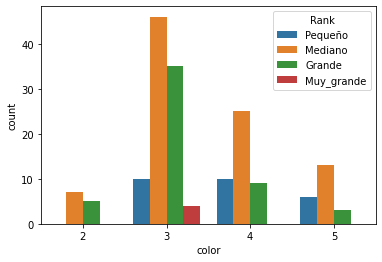

In [43]:
sns.countplot(x="color",data=crabs,hue="Rank")

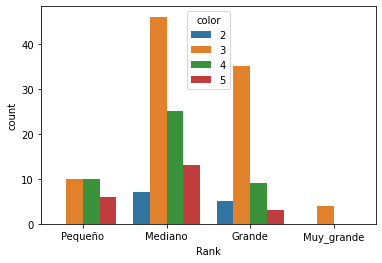

In [50]:
# son mas pequeños los cangrejos a mas calores?
sns.countplot(x="Rank",data=crabs,hue="color")

In [67]:
color_cumsum = pd.DataFrame(index=[2,3,4,5])

In [64]:
rank_color.columns

Index(['Pequeño', 'Mediano', 'Grande', 'Muy_grande', 'All'], dtype='object', name='Rank')

In [68]:
for col in ['Pequeño', 'Mediano', 'Grande', 'Muy_grande']:
    color_cumsum[col] = rank_color[col].cumsum()

In [71]:
color_cumsum

,Pequeño,Mediano,Grande,Muy_grande
2,0.000000,0.076923,0.096154,0.0
3,0.384615,0.582418,0.769231,1.0
4,0.769231,0.857143,0.942308,1.0
5,1.000000,1.000000,1.000000,1.0
